# Исследование продаж компьютерных игр

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании для интернет-магазина компьютерных игр на будущий год.

Описание полей в файле /datasets/games.csv:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Состав исследования:
1. Подготовка данных:
    - Исправление типов и пропусков в значениях;
    - Рассчет суммарных продаж.
2. Исследовательский анализ данных:
    - Анализ продаж по платформам, определение актуальных платформ и актуального временного периода, данные из которого имеет смысл учитывать;
    - Анализ изменения прибыли по платформам, выявление потенциально прибыльных платформ; 
    - Анализ влияния рейтинга игр на продажи внутри популярных платформ;
    - Анализ распределения игр по жанрам, выявление прибыльных жанров.
3. Портрет пользователя по регионам:
    - Самые популярные платформы;
    - Самые популярные жанры;
    - Влияние рейтинга ESRB на продажи в отдельном регионе.
5. Проверка гипотез:
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - Средние пользовательские рейтинги жанров Action и Sports разные.



## Подготовка данных

In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option('display.max_rows', 500)

In [2]:
data = pd.read_csv('/datasets/games.csv')
display(data.sample(10, random_state=1))
data.info()
data.describe()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14230,Rakushou! Pachi-Slot Sengen 5: Rio Paradise,PS2,"2,007.00",Misc,0.00,0.00,0.03,0.00,NaN,NaN,NaN
14043,Nobunaga's Ambition II,3DS,"2,015.00",Strategy,0.00,0.00,0.04,0.00,NaN,NaN,NaN
3158,Up,DS,"2,009.00",Action,0.30,0.27,0.00,0.07,NaN,tbd,E
22,Super Mario Bros. 3,NES,"1,988.00",Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN
110,Mario Kart 8,WiiU,"2,014.00",Racing,3.15,2.15,1.28,0.51,88.00,9.1,E
1988,ATV: Quad Power Racing,PS,"2,000.00",Racing,0.58,0.39,0.00,0.07,42.00,tbd,E
7130,64 de Hakken! Tamagotchi Minna de Tamagotchi W...,N64,"1,997.00",Misc,0.00,0.00,0.22,0.00,NaN,NaN,NaN
8849,Derby Stallion 64,N64,"2,001.00",Sports,0.00,0.00,0.15,0.00,NaN,NaN,NaN
14602,Star Wars: The Force Unleashed II,PC,"2,010.00",Action,0.03,0.00,0.00,0.00,59.00,5.8,T
106,Tekken 3,PS,"1,998.00",Fighting,3.27,2.22,1.40,0.29,96.00,9.1,T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,"16,446.00","16,715.00","16,715.00","16,715.00","16,715.00","8,137.00"
mean,"2,006.48",0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,"1,980.00",0.00,0.00,0.00,0.00,13.00
25%,"2,003.00",0.00,0.00,0.00,0.00,60.00
50%,"2,007.00",0.08,0.02,0.00,0.01,71.00
75%,"2,010.00",0.24,0.11,0.04,0.03,79.00
max,"2,016.00",41.36,28.96,10.22,10.57,98.00


In [3]:
#Переименуем колонки
data.columns = data.columns.str.lower()
#display(data.platform.value_counts())
#display(data.genre.value_counts())
#display(data.year_of_release.value_counts())
#display(data.rating.value_counts())
#display(data.user_score.value_counts())

In [4]:
#Удалим строки с пустым названием
#display(data[data.name.isna()])
data = data[~data.name.isna()]

In [5]:
#Посмотрим на пропуски года выпуска
#display(data[data.year_of_release.isna()])

platform_year = data.pivot_table(index='platform', values='year_of_release', aggfunc = 'median')
#platform_year.head(100)

#Заполним пропуски в годе
data = data.join(platform_year, on='platform', rsuffix='_y')

data['year_of_release'] = data['year_of_release'].where(~data.year_of_release.isna(), data['year_of_release_y'])
#display(data.head(100))
#Удалим временную колонку
data.drop('year_of_release_y', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [6]:

#Оптимизируем типы данных
data.year_of_release = data.year_of_release.astype('int16')
#data.na_sales = data.na_sales.astype('float16') #Замечено, что Pandas не подерживает обработку типа float16 в pivot_table 
#data.eu_sales = data.eu_sales.astype('float16')
#data.jp_sales = data.jp_sales.astype('float16')
#data.other_sales = data.other_sales.astype('float16')
data.critic_score = data.critic_score.astype('float16')
data.user_score = data.user_score.replace('tbd', '-2') #Заменим tbd на -2 перед приведением к числовому типу
data.user_score = data.user_score.fillna(-1) #Заменим пустые значения на -1 перед приведением к числовому типу
data.critic_score = data.critic_score.fillna(-1)
data.rating = data.rating.fillna('N/A')
data.user_score = data.user_score.astype('float16')
#data.rating = data.rating.astype('category')
#data.platform = data.platform.astype('category')
# Вычислим суммарные продажи
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

data.info()
display(data.sample(n=10, random_state=1))
                    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int16
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null float16
user_score         16713 non-null float16
rating             16713 non-null object
total_sales        16713 non-null float64
dtypes: float16(2), float64(5), int16(1), object(4)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
10316,Zombie Army Trilogy,XOne,2015,Shooter,0.05,0.05,0.00,0.01,62.00,7.20,N/A,0.11
15040,Reco Love: Blue Ocean,PSV,2016,Adventure,0.00,0.00,0.02,0.00,-1.00,-1.00,N/A,0.02
3159,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004,Misc,0.46,0.17,0.00,0.01,-1.00,-1.00,N/A,0.64
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,-1.00,-1.00,N/A,17.28
110,Mario Kart 8,WiiU,2014,Racing,3.15,2.15,1.28,0.51,88.00,9.10,E,7.09
1989,Mega Man X4,PS,1996,Action,0.45,0.30,0.22,0.07,-1.00,-1.00,N/A,1.04
7131,Family Party: 30 Great Games Winter Fun,Wii,2010,Sports,0.21,0.00,0.00,0.01,-1.00,-2.00,E,0.22
11022,Yaiba: Ninja Gaiden Z,PS3,2014,Action,0.05,0.03,0.00,0.02,43.00,4.50,M,0.10
14601,R-Type III: The Third Lightning,GBA,2004,Shooter,0.02,0.01,0.00,0.00,46.00,-2.00,E,0.03
106,Tekken 3,PS,1998,Fighting,3.27,2.22,1.40,0.29,96.00,9.10,T,7.18


In [7]:
#display(data.platform.value_counts())
#display(data.genre.value_counts())
#display(data.year_of_release.value_counts())
#display(data.rating.value_counts())
#display(data.user_score.value_counts())

#display(data[data.year_of_release == -1].head(300))
#display(data[data.user_score == -2].platform.value_counts())
#display(data[(data.user_score == 'tbd') & (data.year_of_release == 2016)])
#display(data.query('name in ("Super Mario Bros. 3")'))

### Вывод

1. ~ у 2% данных не заполнен год выхода, причем это не обязательно старые игры. Также, у одной и той же игры может быть не заполнен год на всех платформах выхода. Эту графу мы заполнили медианой по платформе.
2. Примерно у половины данных не заполнена оценка критиков и/или пользователей. Среди не заполненных значений рейтинга пользователей, помимо непосредственно пустых, встречается 'tbd' (to be determined). Возможно частично записи с пустой оценкой - это малопопулярные игры, для которых не набралось достаточно оценок, либо же достаточно старые игры, для которых не было адекватного сбора оценок. Однако среди них есть и те, что с высокими продажами, вышедшие не так давно. И напротив, есть игры с ничтожными продажами и заполненными оценками. Закономерности по платформе тоже не прослеживается. Возможно, это техническая проблема в данных. NaN и tbd мы заменили на -1 и -2 соответственно, чтобы можно было перевести значения в числовые. Вычислить значения не представляется возможным.
3. Не для всех игр заполнен рейтинг ESRB. Для того, чтобы отображать не заполенный рейтинг на диаграммах при анализе, заполнили пустые значения строкой N/A.
4. Колонка с годом выпуска конвертирована в int из float.

## Исследовательский анализ данных

In [8]:
#Посмотрим кол-во игр по годам
data.groupby('year_of_release')['name'].count().hist

<bound method hist_series of year_of_release
1980       9
1981      46
1982      53
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     290
1998     386
1999     341
2000     350
2001     482
2002     829
2003     800
2004     783
2005     973
2006    1006
2007    1197
2008    1457
2009    1476
2010    1302
2011    1161
2012     653
2013     552
2014     582
2015     606
2016     502
Name: name, dtype: int64>

In [9]:
#Посмотрим продажи по платформам
data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS2    1,255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

In [10]:
#Отбросим из данных платформы с самими низкими продажими
data = data.query('platform not in ("SCD", "NG", "WS", "TG16", "3DO", "GG", "PCFX", "DC", "GEN", "SAT")')
data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS2    1,255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
Name: total_sales, dtype: float64

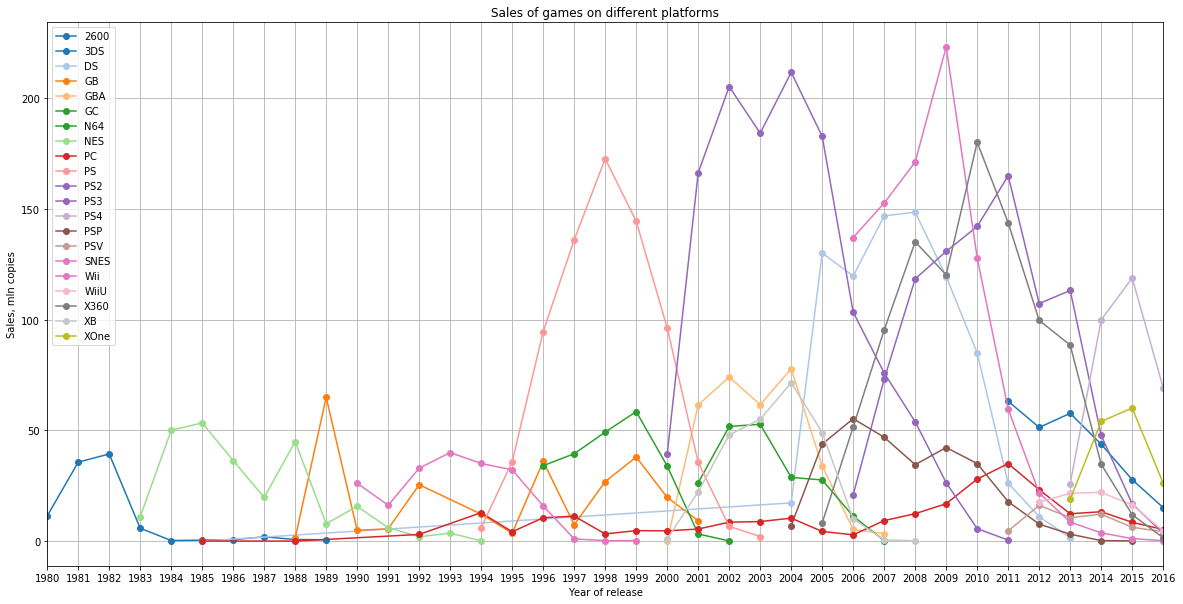

In [11]:
year_stat = data.pivot_table(index = ['year_of_release','platform'], values='total_sales', aggfunc = 'sum').reset_index()
#display(year_stat.query('platform == "DS"'))

#Построим графики суммарных продажи игр по платформам и годам
def draw_year_stat(year_stat, start, end):
    fig, ax = plt.subplots()
    NUM_COLORS = 25
    cm = plt.get_cmap('tab20')
    ax.set_prop_cycle(color = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

    for name, platform_stat in year_stat[year_stat.year_of_release >= start].groupby('platform'):
        ax = platform_stat.plot(style='o-', ax=ax, x= 'year_of_release', y='total_sales', grid=True, label = name, figsize = (20,10))
    plt.xlabel('Year of release')
    plt.ylabel('Sales, mln copies')
    plt.title('Sales of games on different platforms')
    plt.xticks(np.arange(start, end, step=1))
    plt.legend()
    plt.show()


draw_year_stat(year_stat, 1980, 2017)
    
    

По графику можно увидеть, что срок жизни платформ составляет приблизительно 8 лет, за исключением PC. Для того, чтобы не анализировать данные по неактуальным на конец периода платформам, а также учитывая, что предпочтения пользователей могут со временем меняться, а наша задача все-таки строить прогнозы на ближайший период, имеет смысл отбросить записи старше 2013года.

,year_of_release,platform,total_sales
0,2013,3DS,57.76
1,2013,DS,1.54
2,2013,PC,12.38
3,2013,PS3,113.25
4,2013,PS4,25.99
5,2013,PSP,3.14
6,2013,PSV,10.59
7,2013,Wii,8.59
8,2013,WiiU,21.65
9,2013,X360,88.58


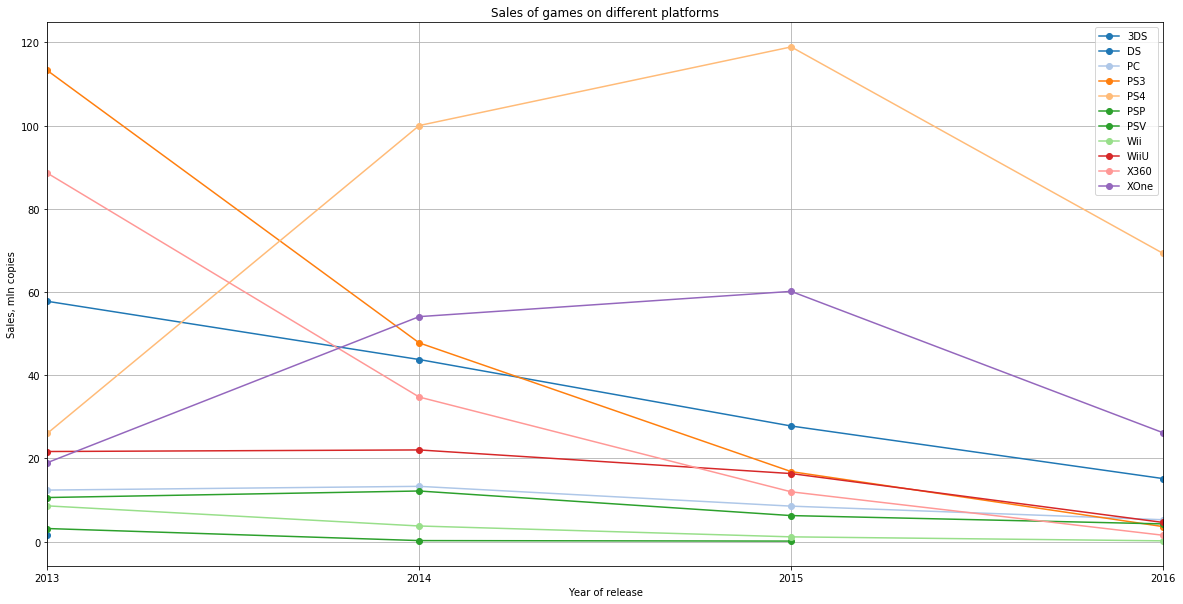

In [12]:
data = data.query('year_of_release >= 2013')
year_stat = data.pivot_table(index = ['year_of_release','platform'], values='total_sales', aggfunc = 'sum').reset_index()
display(year_stat)

draw_year_stat(year_stat, 2013, 2017)



3-ка наиболее популярных платформ по состоянию на 2016г выглядит так: 
 - Play station 4 (преемница PS3)
 - XBox One (преемница XBox 360)
 - Nintendo 3DS

,amax,mean,median,std,var
platform,,,,,
3DS,14.60,0.46,0.09,1.36,1.86
DS,0.51,0.19,0.15,0.17,0.03
PC,3.05,0.21,0.08,0.35,0.12
PS3,21.05,0.53,0.15,1.45,2.11
PS4,14.63,0.80,0.20,1.61,2.59
PSP,0.24,0.05,0.02,0.06,0.00
PSV,1.96,0.09,0.04,0.15,0.02
Wii,3.58,0.59,0.18,0.92,0.84
WiiU,7.09,0.56,0.20,1.04,1.08


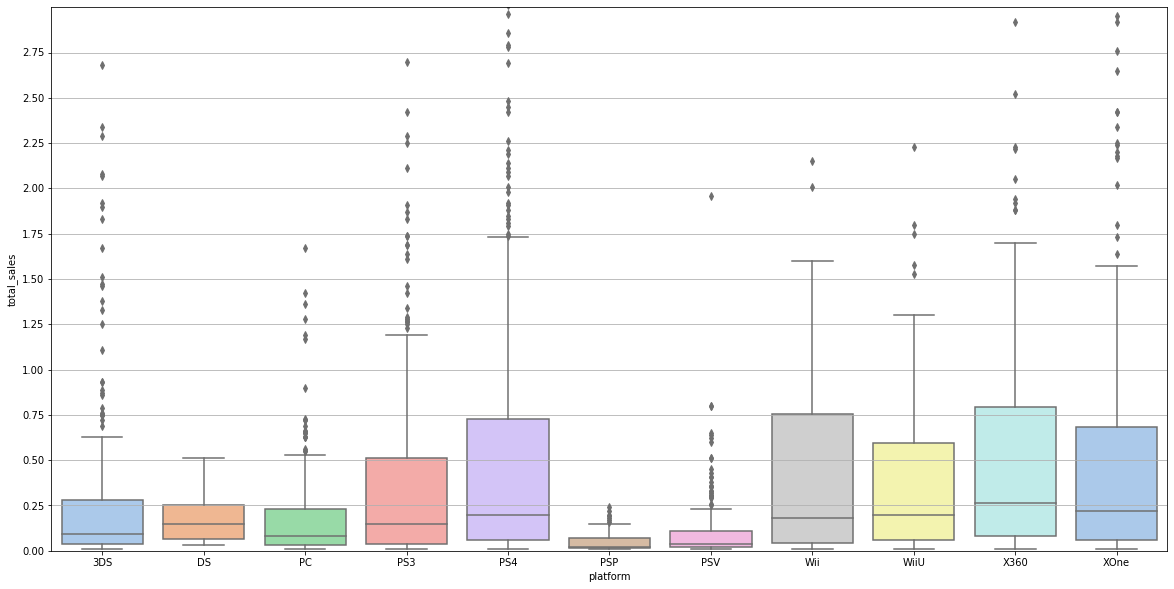

In [13]:
display(data.pivot_table(index='platform', values='total_sales', aggfunc = (np.median, np.mean, np.std, np.var, np.max)))
#display(data.sort_values(by='total_sales', ascending=False).head(5))

#Построим "ящик с усами" для разных платформ
def boxplot(platforms=''):
    _, ax = plt.subplots(figsize=(20,10))
    if not platforms:
        plot_data = data.sort_values(by='platform')
    else:   
        plot_data = data.query('platform in @platforms').sort_values(by='platform')

    sns.boxplot(data=plot_data,
                x='platform',
                y='total_sales',
                palette='pastel',
                fliersize = 5,
                ax=ax)
    ax.set_ylim (0,3)
    ax.yaxis.grid(True)
    ax.set_yticks(np.arange(0,3,step=0.25))
    plt.show()

boxplot()


По всем платформам распределение продаж сильно скошено вправо, медиана сильно ниже среднего объема продаж: **большинство игр выходит небольшим тиражом, но продажи выдающихся игр могут почти на два порядка превышать продажи середнячков**. Медианное значение тиража актуальных на 2016г консолей PS4 и XOne примерно равны и составляют 200тыс экземпляров, зато, например, Call of Duty: Black Ops на PS4 купили почти 15млн раз.

Также заметно, что **на портативных консолях, таких как 3DS, PSV и др, тиражи как в среднем так и по медиане в разы скромнее**, чем на стационарных.

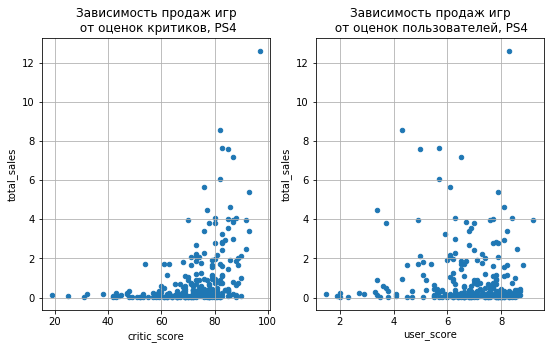

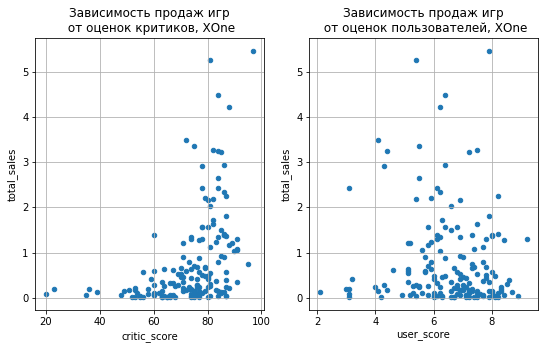

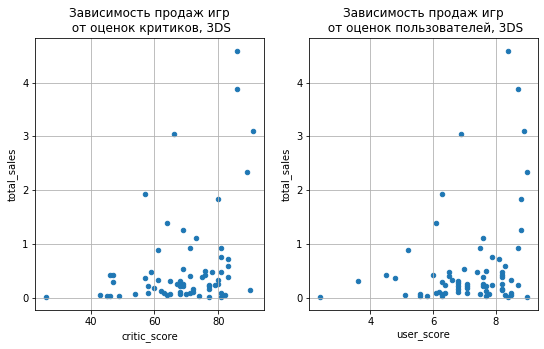

In [14]:
# Построим диаграммы разброса между отзывами и продажами на разных платформах
def scatter(platform):
    data_plot = data.query('platform == @platform and user_score >-1 and critic_score >-1')
    _, (ax1, ax2) = plt.subplots(1, 2)
    data_plot.plot(kind='scatter', 
                   x='critic_score', 
                   y='total_sales', 
                   grid=True, 
                   figsize=(9,5),
                   ax=ax1,
                   title='Зависимость продаж игр\n от оценок критиков, '+platform)
    #print('Коэффициент корреляции:', data_plot.total_sales.corr(data.critic_score))

    data_plot.plot(kind='scatter', 
                   x='user_score', 
                   y='total_sales', 
                   grid=True, 
                   figsize=(9,5), 
                   ax=ax2,
                   title='Зависимость продаж игр\n от оценок пользователей, '+platform)
    plt.show()
    #print('Коэффициент корреляции:', data_plot.total_sales.corr(data.user_score))
    
scatter('PS4')
scatter('XOne')
scatter('3DS')

Посмотрим на **корреляцию параметров** для различных платформ

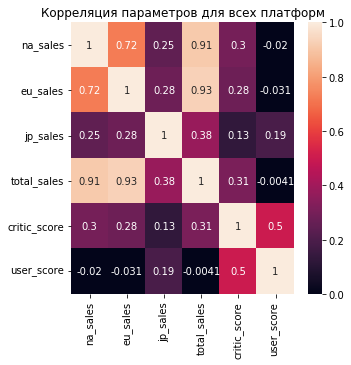

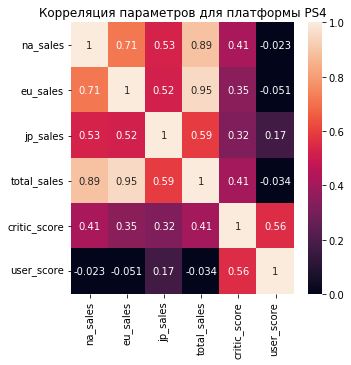

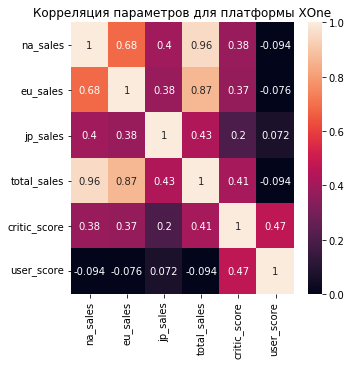

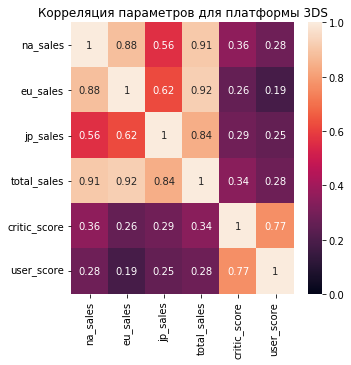

In [15]:
#Построим тепловые карты по корреляции параметров
def corr_heatmap(platform =''):
    if not platform:
        plot_data = data[['na_sales', 'eu_sales', 'jp_sales', 'total_sales', 'critic_score', 'user_score', 'platform']]\
        .query('user_score >-1 and critic_score >-1')
        title = 'Корреляция параметров для всех платформ'
    else:
        plot_data = data[['na_sales', 'eu_sales', 'jp_sales', 'total_sales', 'critic_score', 'user_score', 'platform']]\
        .query('user_score >-1 and critic_score >-1 and platform == @platform')
        title = 'Корреляция параметров для платформы '+platform

    _, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(plot_data.corr(), annot=True, ax=ax, vmin=0, vmax=1)
    ax.set_title(title)
    plt.show()

corr_heatmap()
corr_heatmap('PS4')
corr_heatmap('XOne')
corr_heatmap('3DS')

В пределах имеющихся данных об оценках (она отсутствует примерно у половины игр) можно видеть, что:
- **Продажи на всех популярных консолях имеют среднюю корреляцию c оценками критиков**, хотя чемпионы по тиражам как правило имеют оценку 80 и выше. 
- Как ни странно, у игр **на PS4 и XBox One при этом не прослеживается никакой зависимости продаж от рейтинга пользователей**, но она есть у Nintendo 3DS.

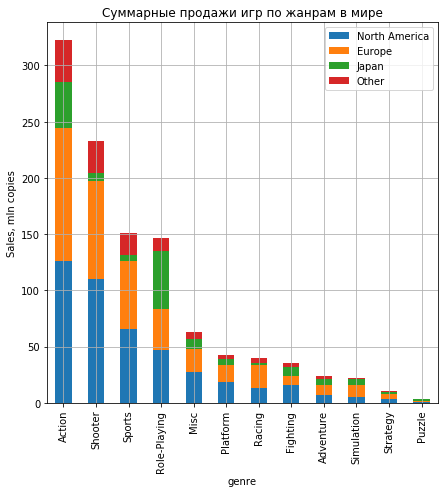

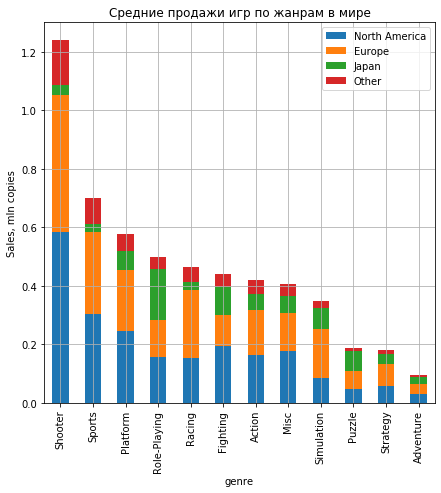

In [16]:
#Общее распределение игр по жанрам

#Общие продажи
genre_sales = data.groupby('genre')['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']\
.sum().sort_values(by='total_sales', ascending=False).reset_index()
genre_sales.drop('total_sales', axis=1, inplace=True)

ax=genre_sales.plot(kind='bar',
                 x = 'genre',
                 stacked = True,
                 grid=True,
                 figsize=(7,7), 
                 title = 'Суммарные продажи игр по жанрам в мире')
plt.legend(["North America", "Europe", "Japan", 'Other'])
ax.set_ylabel('Sales, mln copies')
plt.show()

#Средние продажи
genre_sales = data.groupby('genre')['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']\
.mean().sort_values(by='total_sales', ascending=False).reset_index()
genre_sales.drop('total_sales', axis=1, inplace=True)

ax=genre_sales.plot(kind='bar',
                 x = 'genre',
                 stacked = True,
                 grid=True,
                 figsize=(7,7), 
                 title = 'Средние продажи игр по жанрам в мире')
plt.legend(["North America", "Europe", "Japan", 'Other'])
ax.set_ylabel('Sales, mln copies')
plt.show()


### Вывод

1. Хотя по имеющимся в нашем распоряжении данным продажи в нулевые значительно превышали продажи в 2010е, мы исключили из анализа данные старше 2013 года, чтобы не брать в расчет неактуальные платформы и тренды. Время жизни платформ за рассматриваемое время было довольно значительным и достигало 8-10лет. 3-ка наиболее популярных платформ по состоянию на 2016г выглядит так:
 - Play station 4 (преемница PS3)
 - XBox One (преемница XBox 360)
 - Nintendo 3DS***
2. Большинство игр выходит небольшим тиражом, но продажи по-настоящему популярных могут почти на два порядка превышать продажи середнячков. Медианное значение тиража актуальных на 2016г консолей PS4 и XOne примерно равны и составляют 200тыс экземпляров, зато, например, Call of Duty: Black Ops на PS4 купили почти 15млн раз. На портативных консолях, таких как 3DS и PSV, тиражи как в среднем так и по медиане почти в 2 раза ниже.
3. Продажи на всех популярных консолях имеют среднюю корреляцию от оценок критиков, хотя чемпионы по тиражам как правило имеют оценку 80 и выше. При этом зависимости продаж от рейтинга пользователей почти нет.
4. Больше всего в мире продается игр следующих жанров: Action, Shooter, Sports, RFG и Platform. При этом первые два жанра обязаны продажам в основном Европе и Северной Америке, в то время как в Японии по суммарным продажам лидирует RPG, а Action следует за ним. Если взглянуть на средние продажи на одну игру, то в Европе и Америке в 5ке лидеров вместо RPG выбиваются Гонки, а в Японии лидерами становятся: RPG, Fighting, Platform и Puzzle. Это можно объяснить тем, что игр в жанрах Shooter и Action в целом намного больше и поэтому в суммарных продажах они многих оставляет далеко позади. Но среди тех игр, которые расходятся наибольшим тиражом, в Японии лидируют Ролевые, Бои и Платформы.

## Портрет пользователя по регионам

###  Продажи по жанрам и регионам

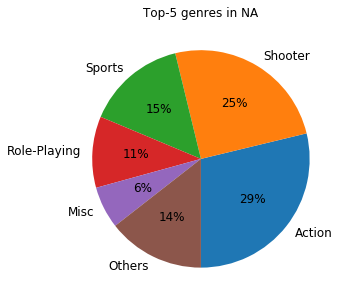

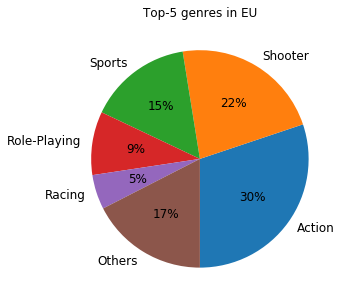

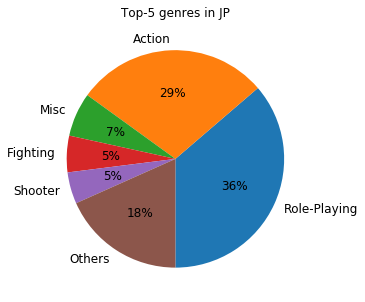

In [17]:
#Построим диаграммы продаж по жанрам и платформам в разрезе регионов

def sales_piechart(index, column):
    plot_data = data.groupby(index)[column].sum().sort_values(ascending=False).reset_index()
    plot_data_top = plot_data[:5].copy()
    others_sum = plot_data[column][5:].sum(axis=0)
    new_row = pd.DataFrame([['Others', others_sum]], columns = plot_data.columns)
    plot_data_top = pd.concat([plot_data_top, new_row], sort=True, ignore_index=True)
    ax = plot_data_top.plot(kind='pie',
                            grid=True, 
                            figsize=(5,5),
                            y=column,
                            labels=plot_data_top[index],
                            autopct='%1.0f%%', 
                            startangle=270, 
                            fontsize=12, 
                            legend=None,
                            title = 'Top-5 '+index+'s in '+(column[:2]).upper())
    ax.yaxis.set_visible(False)
    plt.show()
    
sales_piechart('genre', 'na_sales')
sales_piechart('genre', 'eu_sales')
sales_piechart('genre', 'jp_sales')


В Северной Америке и Европе первенство по продажам занимают игры в жанре Action и Shooter, следом идут спортивные игры.
В Японии с большим отрывом лидируют RPG, 2е место занимает жанр Action.

### Продажи по платформам и регионам

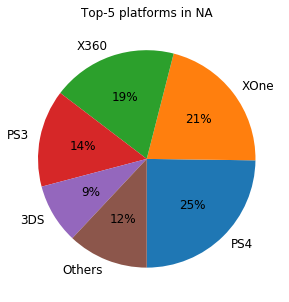

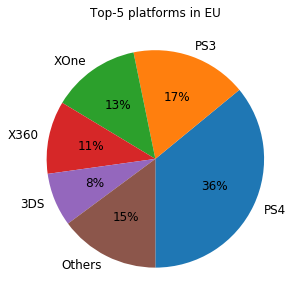

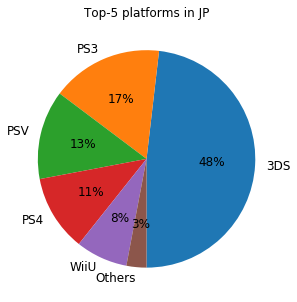

In [18]:
#Построим диаграммы продаж по платформам в разрезе регионов
sales_piechart('platform', 'na_sales')
sales_piechart('platform', 'eu_sales')
sales_piechart('platform', 'jp_sales')

В Северной Америке по продажам лидируют игры на Play Station 4, следом с минимальным отрывом идут XBox One и XBox 360. В сумме доли PS4+PS3 и XBox примерно равны.
В Европе с большим отрывом лидирует PS4, позиции же платформ XBox значительно слабее чем в Северной Америке.
В Японии безоговорочным лидером является портативная платформа Nintendo 3DS c 50% доли. Консоли PS3 и PS4 занимают в сумме ок 30%, а платформ Microsoft в 5ке лидеров нет.

### Влияние рейтинга ESRB на продажи в регионах

In [19]:
#Корреляция рейтинга ESRB и продаж
def scatter_esrb(region):
    data.plot(kind='scatter', 
                   x='rating', 
                   y=region, 
                   grid=True, 
                   figsize=(9,9), 
                   title='Зависимость продаж игр от рейтинга, '+region)
    plt.show()

#scatter_esrb('na_sales')
data['rating'].value_counts()
#data[data.rating.isna()].head(300)

N/A     980
M       369
T       335
E       304
E10+    254
Name: rating, dtype: int64

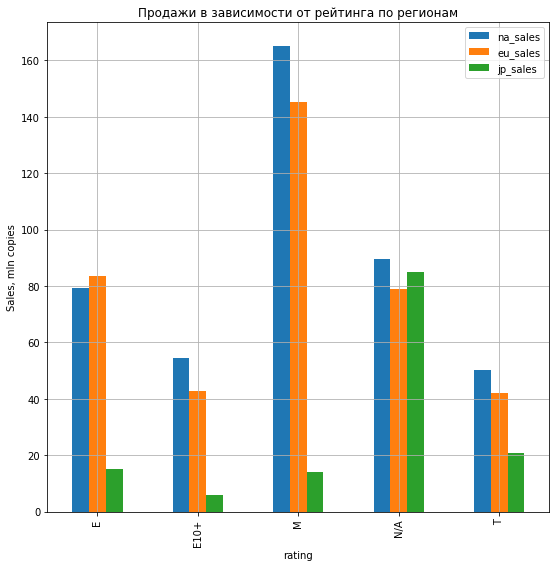

In [20]:
#Построим диаграммы продаж по регионам в разрезе рейтинга ESRB

ax = data.groupby('rating')['na_sales','eu_sales','jp_sales'].sum().plot(kind='bar', 
                                                              grid=True, 
                                                              figsize=(9,9), title = 'Продажи в зависимости от рейтинга по регионам')
ax.set_ylabel('Sales, mln copies')
ax.legend()
plt.show() 

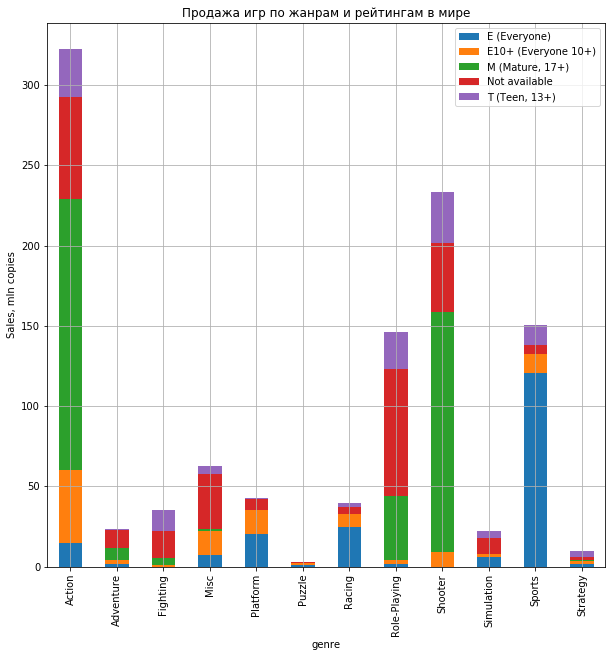

In [21]:
#Построим диаграмму с долей продаж рейтингов внутри каждого жанра
genre_rating_sales = data.pivot_table(index='genre', columns='rating', values='total_sales', aggfunc='sum').reset_index()
ax = genre_rating_sales.plot(kind='bar', 
                        x = 'genre',
                        stacked='True',
                        grid=True,
                        figsize = (10,10),
                        title = 'Продажа игр по жанрам и рейтингам в мире')
plt.legend(["E (Everyone)", "E10+ (Everyone 10+)", "M (Mature, 17+)", "Not available", "T (Teen, 13+)"])
ax.set_ylabel('Sales, mln copies')
plt.show()
    

Как видно по диаграмме "Продажи в зависимости от рейтинга по регионам", **в Европе и Северной Америке наибольшие продажи имеют игры с рейтингом M (17+)**. Если посмотреть на жанры Action и Shooter, пользующиеся в тех же регионах наибольшим спросом, внутри них также преобладают игры с рейтингом М. Трудно сказать, что является первичным при выборе игры - жанр или рейтинг.
В японии же наибольшей долей продаж (после N/A, то есть неопределенного рейтинга) обладают игры категории T (13+). В то время как категория T не является доминирующей в наиболее популярных в Японии жанрах (RPG и Action). Здесь можно с большей уверенностью утверждать, что **в Японии более популярны игры для подростков до 17 лет.**

### Вывод

1. В Северной Америке и Европе первенство по продажам занимают игры в жанрах Action и Shooter, следом идут спортивные игры. В Японии с большим отрывом лидируют RPG, 2е место занимает жанр Action.
2. В Северной Америке лидируют игры на Play Station 4, следом с минимальным отрывом идут XBox One и XBox 360. В Европе с большим отрывом лидирует PS4, позиции же платформ XBox значительно слабее чем в Америке. В Японии безоговорочным лидером является портативная платформа Nintendo 3DS c 50% доли.
3. В Европе и Северной Америке наибольшие продажи имеют игры с рейтингом M (17+). Это вполне согласуется с наиболее популярными там жанрами Action и Shooter. В Японии же наиболее популярны игры для подростков до 17 лет.

## Проверка гипотез

Проверим следующие уверждения: 

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Так как мы сравнием среднее выборок с двух рахных платформ, то:
    - За нулевую гипотезу примем, что Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
    - Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC разные
2. Средние пользовательские рейтинги жанров Action и Sports разные. В этом случае как обычно, за нулевую гипотезу мы должны принять, что рейтинги одинаковые, а за альтернативную - что разные. В случае если мы отвергаем нулевую гипотезу, то альтернативная подтвержается (не-отвергается)
    - Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые
    - Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports отличаются
    
За критерий проверки нулевых гипотез примем критерий p-value < уровень статистической значимости.

 ### Средние пользовательские рейтинги платформ Xbox One и PC

Построим распределения выборок пользовательских оценок по платформам XBox One и PC и сравним средние и дисперсию.

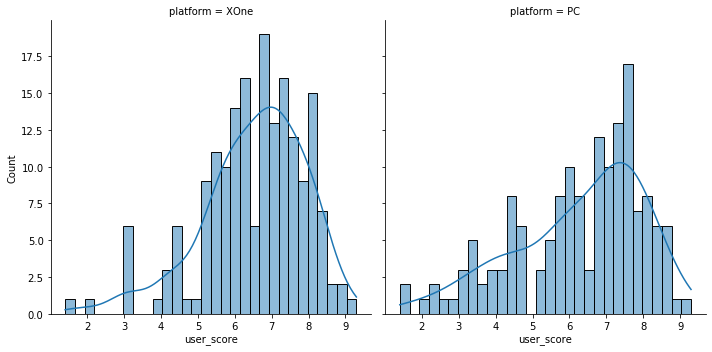

,mean,var
platform,,
3DS,6.93,2.38
DS,4.80,nan
PC,6.27,3.04
PS3,6.35,3.23
PS4,6.75,2.13
PSP,5.85,11.98
PSV,7.53,1.73
Wii,5.26,3.59
WiiU,7.02,1.98


In [35]:
#Построим гистограмму
plot_data = data.query('user_score > -1 and platform in ("XOne", "PC")')
sns.displot(data=plot_data, 
            x='user_score',
            col='platform',
            bins=30, 
            kde=True
           )
plt.show()
#Определим дисперсии и средние
display(data.pivot_table(index='platform', values='user_score', aggfunc = (np.mean, np.var)))

Распределения похожи на скошенные нормальные распределения. 
Средная пользовательская оценка у PC = 6.27, у XOne = 6.52. При тестировании гипотезы мы как раз и проверим, не случайно ли это отличие и действительно ли оно о чем-то говорит.

Т.к. дисперсии выборок у PC и XOne сильно отличаются, то при тестировании выборок примем _equal_var=False_.
Выборки по разным жанрам и платформам можно рассматривать как независимые выборки из разных генеральных совокупностей. Поэтому для их сравнения применяем метод scipy.stats.ttest_ind.

In [33]:
#Проверим гипотезу, что Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
#Уберем из выборки технические значения -1 и -2
data = data[data.user_score > -1]

alpha = 0.05
results = st.ttest_ind(data[data.platform == 'XOne'].user_score, data[data.platform == 'PC'].user_score, equal_var=False)
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем гипотезу о том, что Средние пользовательские рейтинги платформ Xbox One и PC одинаковые")
else:
    print("Не получилось отвергнуть гипотезу о том, что Средние пользовательские рейтинги платформ Xbox One и PC одинаковые")

p-value: 0.14414956265829446
Не получилось отвергнуть гипотезу о том, что Средние пользовательские рейтинги платформ Xbox One и PC одинаковые


### Средние пользовательские рейтинги жанров Action и Sports

Построим распределения выборок пользовательских оценок по жанрам Action и Sports и сравним средние и дисперсию.

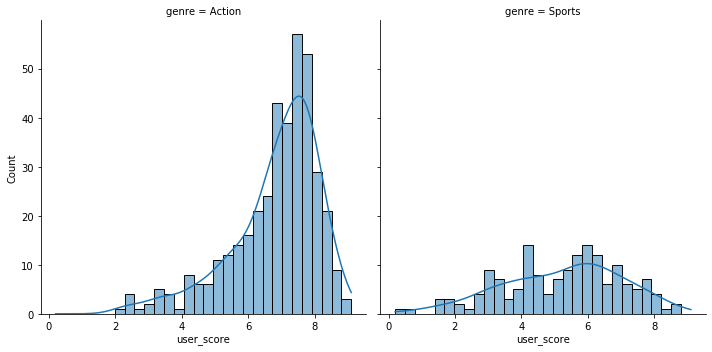

,mean,var
genre,,
Action,6.84,1.76
Adventure,7.41,1.83
Fighting,7.04,1.92
Misc,6.98,1.41
Platform,6.71,2.89
Puzzle,7.47,0.89
Racing,6.08,2.99
Role-Playing,7.38,1.48
Shooter,6.34,2.15


In [38]:
#Построим гистограмму
plot_data = data.query('user_score > -1 and genre in ("Action", "Sports")')
sns.displot(data=plot_data, 
            x='user_score',
            col='genre',
            bins=30, 
            kde=True
           )
plt.show()
#Определим дисперсии и средние
display(data.pivot_table(index='genre', values='user_score', aggfunc = (np.mean, np.var)))

Распределения похожи на скошенные нормальные распределения. 
Средная пользовательская оценка у Action = 6.84, у Sports = 5.24. При тестировании гипотезы мы проверим, не случайно ли это отличие и действительно ли они различаются.

Т.к. дисперсии у выборок разные, то при тестировании примем _equal_var=False_.
Выборки по разным жанрам можно рассматривать как независимые выборки из разных генеральных совокупностей. Поэтому для их сравнения применяем метод scipy.stats.ttest_ind.

In [37]:
#Проверим гипотезу, что Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) 
#и Sports (англ. «спортивные соревнования») разные.
#Нулевая гипотеза: средние рейтинги у двух жанров одинаковые

alpha = 0.05
results = st.ttest_ind(data[data.genre == 'Action'].user_score, data[data.genre == 'Sports'].user_score, equal_var=False)
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем гипотезу о том, что Средние пользовательские рейтинги жанров Action и Sports одинаковые")
else:
    print("Не получилось отвергнуть гипотезу о том, что Средние пользовательские рейтинги жанров Action и Sports одинаковые")

p-value: 1.5461711636643233e-20
Отвергаем гипотезу о том, что Средние пользовательские рейтинги жанров Action и Sports одинаковые


### Вывод

Результат проверки гипотез:

**1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**

**2. Средние пользовательские рейтинги жанров Action и Sports отличаются. У жанра Action средний рейтинг выше.**